# Question 1

This is the set up for question 1, which includes importing all needed libraries and loading in the data to a data frame called df using pandas

In [1]:
# Set-up
import pandas as pd
import re
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('facteus_10k_user_panel.csv')

This next part is the solution to part a, and it identifies merchants from merchant_string_example using a method called identify_merchant. The result is stored in a column called identified_merchant. The first few and last rows of the data frame is displayed to show the added row called identify_merchant.

In [2]:
# Part a: Isolate variations of merchant strings
def identify_merchant(merchant_string):
    word = 'OTHER'
    if not isinstance(merchant_string, str):
        return word
    if re.search(r'.*MCDONALD.*', merchant_string, re.IGNORECASE):
        word = 'MCDONALDS'
    elif re.search(r'.*(AM[A]?Z[O]?N|PRIME|KINDLE).*', merchant_string, re.IGNORECASE):
        word = 'AMAZON'
    elif re.search(r'.*(APPLE|ITUNES).*', merchant_string, re.IGNORECASE):
        word = 'APPLE'
    return word

df['identified_merchant'] = df['merchant_string_example'].apply(identify_merchant)
df

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,identified_merchant
0,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV,AMZN,NASDAQ,2,4.72,1.88,2.84,AMAZON
1,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,DUNKIN DONUTS,DUNKIN #308696 Q35 IRVINGTON NJUS0EBSE,DNKN,NASDAQ,1,7.33,7.33,7.33,OTHER
2,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,EXXON MOBIL,EXXONMOBIL 99243909 NEWARK NJUS1JJWD,XOM,NYSE,1,10.02,10.02,10.02,OTHER
3,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,PNC BANK,PNC BANK MAPYJCUN,PNC,NYSE,3,212.44,29.74,102.36,OTHER
4,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML,AMZN,NASDAQ,3,44.04,10.17,20.94,AMAZON
...,...,...,...,...,...,...,...,...,...,...,...
4242940,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,7-ELEVEN,7ELEVEN-FCTI CHAZOZXT,3382,Tokyo Stock Exchange,8,206.00,2.13,60.89,OTHER
4242941,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,AMC THEATRES,AMC CAROLINA PAV #0681 CHARLOTTE NCUSR1YLQ,AMC,NYSE,1,13.70,13.70,13.70,OTHER
4242942,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,ARBYS,ARBYS #5989 CHARLOTTE CHARLOTTE NCUSRAMID,NaN,NaN,1,5.20,5.20,5.20,OTHER
4242943,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,BATH & BODY WORKS,BATH AND BODY WORKS 328PINEVILLE NCUS5CCGT,LB,NYSE,1,67.57,67.57,67.57,OTHER


This next part is the solution to part b, and it identifies city from merchant_string_example using a method called extract_city. This is only possible for the merchant MCDONALDS so the function checks for that. The result is stored in a column called city. The cities found are separated into a data frame called non_nan_cities, which is then displayed.

In [13]:
# Part b: Create regex to isolate the city (assuming it's part of merchant_string_example)
state_abbreviations = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}

def extract_city(merchant_string):
    if not isinstance(merchant_string, str) or not re.search(r'.*MCDONALD.*', merchant_string, re.IGNORECASE): 
        return np.nan
    match = re.search(r"\b([A-Z]+(?:\s+[A-Z]+)+)US", merchant_string)
    if match:
        cityValue = match.group(0)[:-4]  # drop the state (2 letters) and 'US'
        if cityValue.startswith('OF'):  # exception handling for cases where 'OF (2-letter STATE)' appears before city name
            cityValue = cityValue[6:]
        return cityValue
    return np.nan

df['city'] = df['merchant_string_example'].apply(extract_city)
non_nan_cities = df[df['city'].notna()][['merchant', 'city', 'date', 'merchant_string_example']]
print(non_nan_cities)

          merchant           city                     date  \
68       MCDONALDS  IRVINGTON      2018-11-01 00:00:00 UTC   
74       MCDONALDS  IRVINGTON      2018-12-01 00:00:00 UTC   
99       MCDONALDS  NEWARK         2019-04-01 00:00:00 UTC   
146      MCDONALDS  NORWICH        2019-10-01 00:00:00 UTC   
234      MCDONALDS  ORLANDO        2019-01-01 00:00:00 UTC   
...            ...            ...                      ...   
4242855  MCDONALDS  DEER PARK      2020-08-01 00:00:00 UTC   
4242869  MCDONALDS  DEER PARK      2020-09-01 00:00:00 UTC   
4242881  MCDONALDS  DEER PARK      2020-10-01 00:00:00 UTC   
4242892  MCDONALDS  DEER PARK      2020-11-01 00:00:00 UTC   
4242906  MCDONALDS  HOUSTON        2020-12-01 00:00:00 UTC   

                               merchant_string_example  
68       MCDONALD'S F7991       IRVINGTON    NJUSULB4I  
74       MCDONALD'S F7991       IRVINGTON    NJUSVJ31Q  
99       MCDONALD'S F1928       NEWARK       NJUSSCO13  
146      MCDONALD'S F1166  

This next part is the solution to part c, and it removes transaction ID from merchant_string_example using a method called remove_transaction_id. The result is stored in a column called cleaned_merchant_string. The first few and last rows of the data frame is displayed to show the added row called cleaned_merchant_string.

In [7]:
# Part c: Remove transaction ID if present (assuming IDs are numeric strings at the end)
def remove_transaction_id(merchant_string):
    if isinstance(merchant_string, str):
        return re.sub(r'#\d+', '', merchant_string)
    return merchant_string

df['cleaned_merchant_string'] = df['merchant_string_example'].apply(remove_transaction_id)
df

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,identified_merchant,city,cleaned_merchant_string
0,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV,AMZN,NASDAQ,2,4.72,1.88,2.84,AMAZON,NaN,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSPUGLV
1,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,DUNKIN DONUTS,DUNKIN #308696 Q35 IRVINGTON NJUS0EBSE,DNKN,NASDAQ,1,7.33,7.33,7.33,OTHER,NaN,DUNKIN Q35 IRVINGTON NJUS0EBSE
2,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,EXXON MOBIL,EXXONMOBIL 99243909 NEWARK NJUS1JJWD,XOM,NYSE,1,10.02,10.02,10.02,OTHER,NaN,EXXONMOBIL 99243909 NEWARK NJUS1JJWD
3,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-01-01 00:00:00 UTC,PNC BANK,PNC BANK MAPYJCUN,PNC,NYSE,3,212.44,29.74,102.36,OTHER,NaN,PNC BANK MAPYJCUN
4,a04:512:000ACA1D00B403C9BD4848010BBBCB63,2018-02-01 00:00:00 UTC,AMAZON,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML,AMZN,NASDAQ,3,44.04,10.17,20.94,AMAZON,NaN,AMAZON MKTPLACE PMTS AMZN.COM/BILLWAUSOA5ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242940,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,7-ELEVEN,7ELEVEN-FCTI CHAZOZXT,3382,Tokyo Stock Exchange,8,206.00,2.13,60.89,OTHER,NaN,7ELEVEN-FCTI CHAZOZXT
4242941,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,AMC THEATRES,AMC CAROLINA PAV #0681 CHARLOTTE NCUSR1YLQ,AMC,NYSE,1,13.70,13.70,13.70,OTHER,NaN,AMC CAROLINA PAV CHARLOTTE NCUSR1YLQ
4242942,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,ARBYS,ARBYS #5989 CHARLOTTE CHARLOTTE NCUSRAMID,NaN,NaN,1,5.20,5.20,5.20,OTHER,NaN,ARBYS CHARLOTTE CHARLOTTE NCUSRAMID
4242943,a04:512:E61B330AB05882BB6F20F35565F07E64,2018-02-01 00:00:00 UTC,BATH & BODY WORKS,BATH AND BODY WORKS 328PINEVILLE NCUS5CCGT,LB,NYSE,1,67.57,67.57,67.57,OTHER,NaN,BATH AND BODY WORKS 328PINEVILLE NCUS5CCGT


A confusion matrix is constructed from a random sample of 200 and displayed.

Confusion Matrix:
 [[6 0 0 0]
 [0 3 0 0]
 [0 0 7 0]
 [0 0 0 0]]


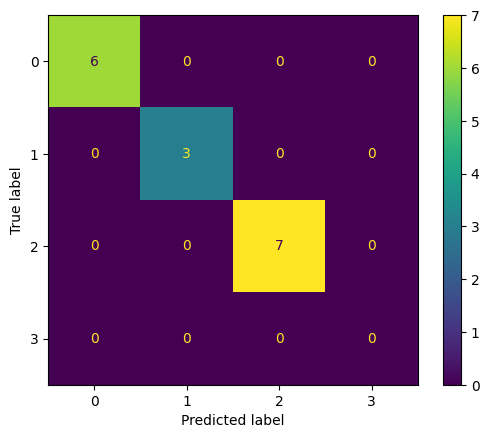

In [8]:
# Sample 200 rows for manual evaluation
sample_df = df.sample(200, random_state=39)

# Construct a confusion matrix to evaluate error rates
true_merchants = sample_df['merchant']
predicted_merchants = sample_df['identified_merchant']
conf_matrix = metrics.confusion_matrix(true_merchants, predicted_merchants, labels = ['MCDONALDS', 'AMAZON', 'APPLE', 'OTHER'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

# Display results
print("Confusion Matrix:\n", conf_matrix)
cm_display.plot()
plt.show()

#### Diagonal Cells (Correct Predictions):
- (0, 0): 6 — Six transactions were correctly classified as MCDONALDS.
- (1, 1): 3 — Three transactions were correctly classified as AMAZON.
- (2, 2): 7 — Seven transactions were correctly classified as APPLE.
- (3, 3): 0 — No transactions were classified as OTHER (and no actual OTHER labels are present in the sampled data).

#### Off-Diagonal Cells (Misclassifications):
- All 0
- No misclassifications

#### Interpretation:
- This confusion matrix shows perfect accuracy for the classes MCDONALDS, AMAZON, and APPLE in the sampled data.
- The OTHER class has no entries, either as true labels or predictions.

A confusion matrix is constructed from the values outside of the sample and displayed.

Confusion Matrix:
 [[166550      0      0      0]
 [     0 115281      0      0]
 [     0      0 105467      0]
 [     0      0      0      0]]


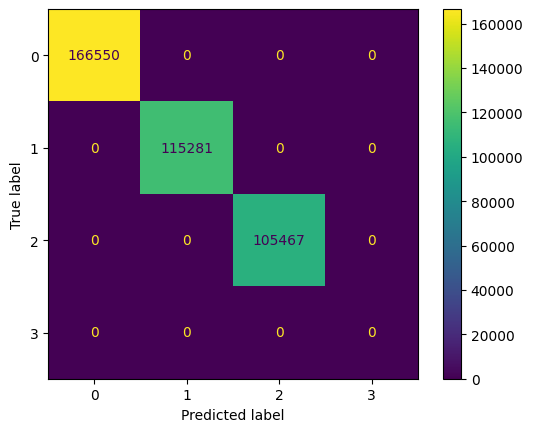

In [9]:
# Part 3: Test the regular expression on the rest of the data to minimize false positives
# Calculate false positive rate
test_df = df[~df.index.isin(sample_df.index)]  # Exclude sampled rows

test_true_merchants = test_df['merchant']
test_predicted_merchants = test_df['identified_merchant']

test_conf_matrix = metrics.confusion_matrix(test_true_merchants, test_predicted_merchants, labels = ['MCDONALDS', 'AMAZON', 'APPLE', 'OTHER'])
test_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_conf_matrix)

# Display results
print("Confusion Matrix:\n", test_conf_matrix)
test_cm_display.plot()
plt.show()

#### Diagonal Cells (Correct Predictions):
- (0, 0): 166550 — Six transactions were correctly classified as MCDONALDS.
- (1, 1): 115281 — Five transactions were correctly classified as AMAZON.
- (2, 2): 105467 — Four transactions were correctly classified as APPLE.
- (3, 3): 0 — No transactions were classified as OTHER (and no actual OTHER labels are present in the sampled data).

#### Off-Diagonal Cells (Misclassifications):
- All 0
- No misclassifications

#### Interpretation:
- This confusion matrix shows perfect accuracy for the classes MCDONALDS, AMAZON, and APPLE in the test data.
- The OTHER class has no entries, either as true labels or predictions.

# Debug

This code was used to check misclassified information until it resulted in none so no rows should be printed.

In [10]:
labels = ['MCDONALDS', 'AMAZON', 'APPLE', 'OTHER']
misclassified_df = test_df[test_df['merchant'] != test_df['identified_merchant']]
misclassified_df = misclassified_df[
    (misclassified_df['merchant'] == 'MCDONALDS') |
    (misclassified_df['merchant'] == 'AMAZON') |
    (misclassified_df['merchant'] == 'APPLE')
]
misclassified_df

,account,date,merchant,merchant_string_example,merchant_ticker,merchant_exchange,transactions,spend,spend_min,spend_max,identified_merchant,city,cleaned_merchant_string


# Question 2

This is the set up for question 2, which includes importing all needed libraries and loading in the data to a data frame called df using pandas

In [11]:
# Set-up
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Repeated from Question 1
df = pd.read_csv('facteus_10k_user_panel.csv')

The data is filtered to a select 10 merchants, then it is preprocessed to remove non-alphanumeric characters and convert to lowercase. Then using CountVectorizer, the code creates a vector space representation where 1-grams, 2-grams, and 3-grams are generated without stop word removal. A TfidfVectorizer is then applied to convert the merchant text into a TF-IDF weighted vector space, capturing the importance of each term based on frequency. The vector space is filtered to exclude n-grams appearing in fewer than 3% of documents, improving focus on more common patterns. A logistic regression model, trained using a one-vs-rest approach, is applied to predict merchant categories. The data is split into training and test sets, with the logistic regression model fitting on the training data to classify the merchant names.

In [12]:
# Part 2: Filter in on a select list of merchants
filtered_df = df[df['merchant'].str.upper().isin([
    'WALMART', 'MCDONALDS', 'AMAZON', 'APPLE', 
    'SHELL', 'WENDYS', 'TACO BELL', 'BURGER KING', 
    'DOLLAR GENERAL', 'ACE HARDWARE'
])]

# Part 3: Create a  1-3 gram vector space using no stemming from , no stop words and a word tokenizer with default settings
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    return text.lower()

# Apply preprocessing to the 'merchant_string_example' column
filtered_df = filtered_df.copy()  # Ensures we're working with a copy to avoid the warning
filtered_df.loc[:, 'merchant_string_clean'] = filtered_df['merchant'].apply(preprocess_text)

vectorizer = CountVectorizer(ngram_range=(1, 3)) # Creates 1-gram, 2-gram, and 3-gram features

# Fit and transform the filtered data to create the vector space matrix
X_counts = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Part 4: Create a vector space matrix matrix from the above using countvectorizer and TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit and transform the data with TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Part 5: Remove ngrams which occur in less than ~3% of the strings
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    min_df=0.03    # Excludes terms appearing in fewer than 3% of documents
)

X_tfidf_filtered = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Part 6: Using the above matrix and a multi-label classification predictive model
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_filtered, filtered_df['merchant_string_clean'], test_size=0.2)

# Train the logistic regression model
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In this part, the code performs a 10-fold cross-validation on the trained logistic regression model to evaluate its performance across different data splits. This approach helps validate the model’s generalizability. The output shows cross-validation scores of 1.0 for each fold, indicating perfect classification accuracy in all 10 subsets of the data, suggesting an exceptionally well-fitted model.

In [13]:
# Part 7: Construct the model leaving some data out (10 fold xval or a 20% random sample)
# Perform 10-fold cross-validation
scores = cross_val_score(model, X_tfidf_filtered, filtered_df['merchant_string_clean'], cv=10)
print(f'Cross-Validation Scores: {scores}')

Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Here, the model's performance is tested on an out-of-sample dataset (the test set). The classification_report function generates detailed metrics, including precision, recall, and F1-score for each merchant category. The output reveals a perfect score of 1.0 across all metrics for each category, confirming that the model classifies all merchant names correctly in the test set as well.

In [14]:
# Part 8: Evaluate your model on out-of-sample data and show out-of-sample error for each of the 10 merchants
# Predict on the test set
y_pred = model.predict(X_test)

# Show evaluation metrics
print(classification_report(y_test, y_pred, target_names=filtered_df['merchant_string_clean'].unique()))

                precision    recall  f1-score   support

        amazon       1.00      1.00      1.00       329
         apple       1.00      1.00      1.00     23045
dollar general       1.00      1.00      1.00     20878
         shell       1.00      1.00      1.00     13630
     mcdonalds       1.00      1.00      1.00     12751
       walmart       1.00      1.00      1.00     33034
     taco bell       1.00      1.00      1.00     17888
        wendys       1.00      1.00      1.00     13706
   burger king       1.00      1.00      1.00     37493
  ace hardware       1.00      1.00      1.00     14650

      accuracy                           1.00    187404
     macro avg       1.00      1.00      1.00    187404
  weighted avg       1.00      1.00      1.00    187404



# Question 3

This is the set up for question 3, which includes importing all needed libraries and loading in the data to a data frame called df using pandas

In [3]:
# Set-up
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

df = pd.read_csv('facteus_10k_user_panel.csv')

This is the set up continued, but the portion from Question 2. This is repeated because a random sample of 500 rows is used for the next steps since there is not enough memory to proceed on all of the data.

In [4]:
# Previous Steps to Obtain Matrix (From Question 2)
# Part 2: Filter in on a select list of merchants
filtered_df = df[df['merchant'].str.upper().isin([
    'WALMART', 'MCDONALDS', 'AMAZON', 'APPLE', 
    'SHELL', 'WENDYS', 'TACO BELL', 'BURGER KING', 
    'DOLLAR GENERAL', 'ACE HARDWARE'
])]

# Part 3: Create a  1-3 gram vector space using no stemming from , no stop words and a word tokenizer with default settings
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    return text.lower()

# Apply preprocessing to the 'merchant_string_example' column
# Only change is that the filtered_df is a sample of 500 rows
filtered_df = filtered_df.sample(500, random_state=42)  # Ensures we're working with a copy to avoid the warning
filtered_df.loc[:, 'merchant_string_clean'] = filtered_df['merchant'].apply(preprocess_text)

vectorizer = CountVectorizer(ngram_range=(1, 3)) # Creates 1-gram, 2-gram, and 3-gram features

# Fit and transform the filtered data to create the vector space matrix
X_counts = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Part 4: Create a vector space matrix matrix from the above using countvectorizer and TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Fit and transform the data with TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(filtered_df['merchant_string_clean'])

# Part 5: Remove ngrams which occur in less than ~3% of the strings
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    min_df=0.03    # Excludes terms appearing in fewer than 3% of documents
)

X_tfidf_filtered = vectorizer.fit_transform(filtered_df['merchant_string_clean'])

This next part reduces the dimensionality to 2 using t-SNE, and then the data is plotted on a scatter plot.

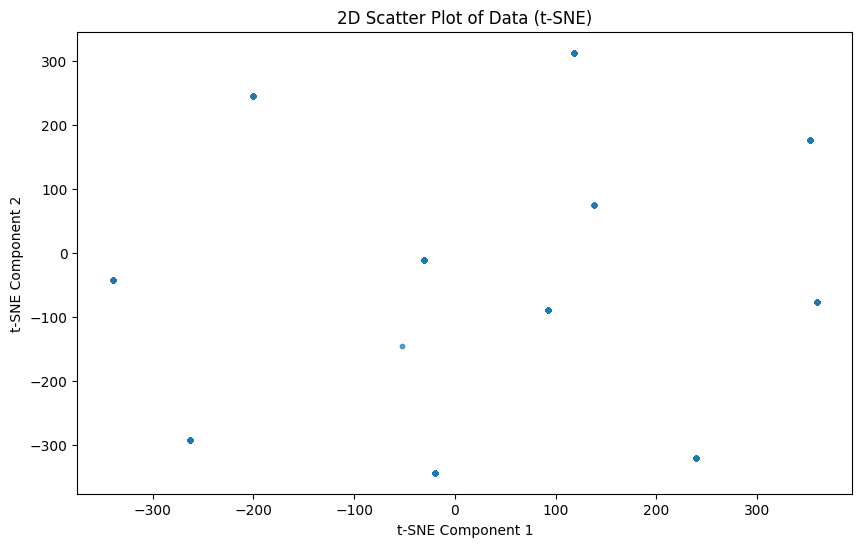

In [5]:
# Part 1: Reduce the dimensionality to 2D
# Normalize the data
X_normalized = StandardScaler().fit_transform(X_tfidf_filtered.toarray())

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X_normalized)

# Part 2: Draw a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10, alpha=0.7)
plt.title("2D Scatter Plot of Data (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

This next part clusters the data using K-means with a value of 10 for k. Then the data is plotted using a Voronoi Diagram with the actual merchant names colored in.

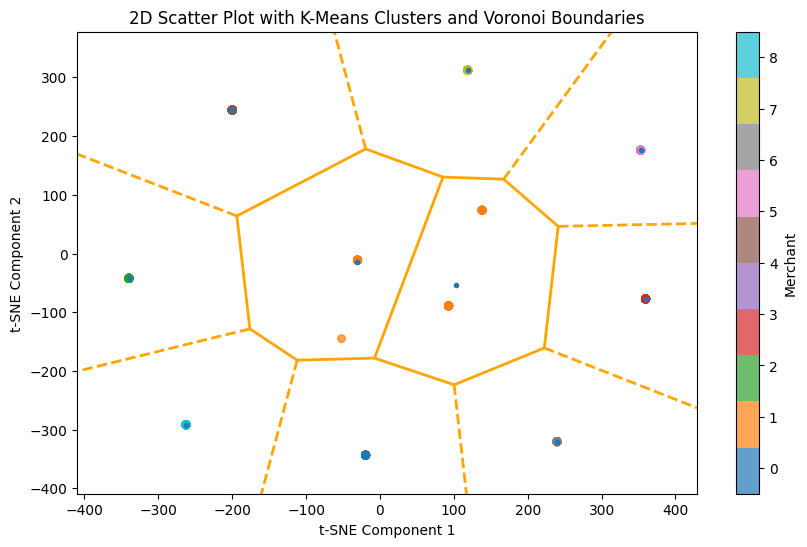

In [6]:
# Step 3: Cluster the data using K-means with k=10 and plot Voronoi Diagram using scipy and matplotlib
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_2d)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))

# Step 4: Scatter plot of the data points, colored by real merchant names
merchant_names = filtered_df['merchant'].unique()
merchant_colors = {merchant: i for i, merchant in enumerate(merchant_names)}
colored_labels = filtered_df['merchant'].map(merchant_colors)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colored_labels, cmap='tab10', s=30, alpha=0.7)
plt.colorbar(scatter, ticks=range(len(merchant_names)), label='Merchant')
plt.clim(-0.5, len(merchant_names) - 0.5)

# Generate and plot Voronoi diagram based on K-means centers
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

plt.title("2D Scatter Plot with K-Means Clusters and Voronoi Boundaries")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()